In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.style as style
import os.path
path = '/mnt/c/Users/alon4/Dropbox/Labs/Lab C1/Particles'
# path = 'C:/Users/Oren Kereth/Dropbox/מעבדה ג1 (1)/Particles'
# style.use('ggplot')
plt.rcParams['figure.figsize'] = [20,10]
UPS = pd.read_excel(os.path.join(path, "Fit/Third Part/SR_UPS/SR_UPS.xlsx")).set_index('Mass [GeV]')
JPsi = pd.read_excel(os.path.join(path, "Fit/Third Part/SR_JPsi/SR_JPsi.xlsx")).set_index('Mass [GeV]')
JPsi

,ΔMass [Gev],events,Δevents
Mass [GeV],,,
1.100149,0.099867,188,13.711309
1.299884,0.099867,228,15.099669
1.499619,0.099867,222,14.899664
1.699353,0.099867,211,14.525839
1.899088,0.099867,287,16.941074
2.098823,0.099867,248,15.748016
2.298557,0.099867,235,15.329710
2.498292,0.099867,255,15.968719
2.698027,0.099867,311,17.635192


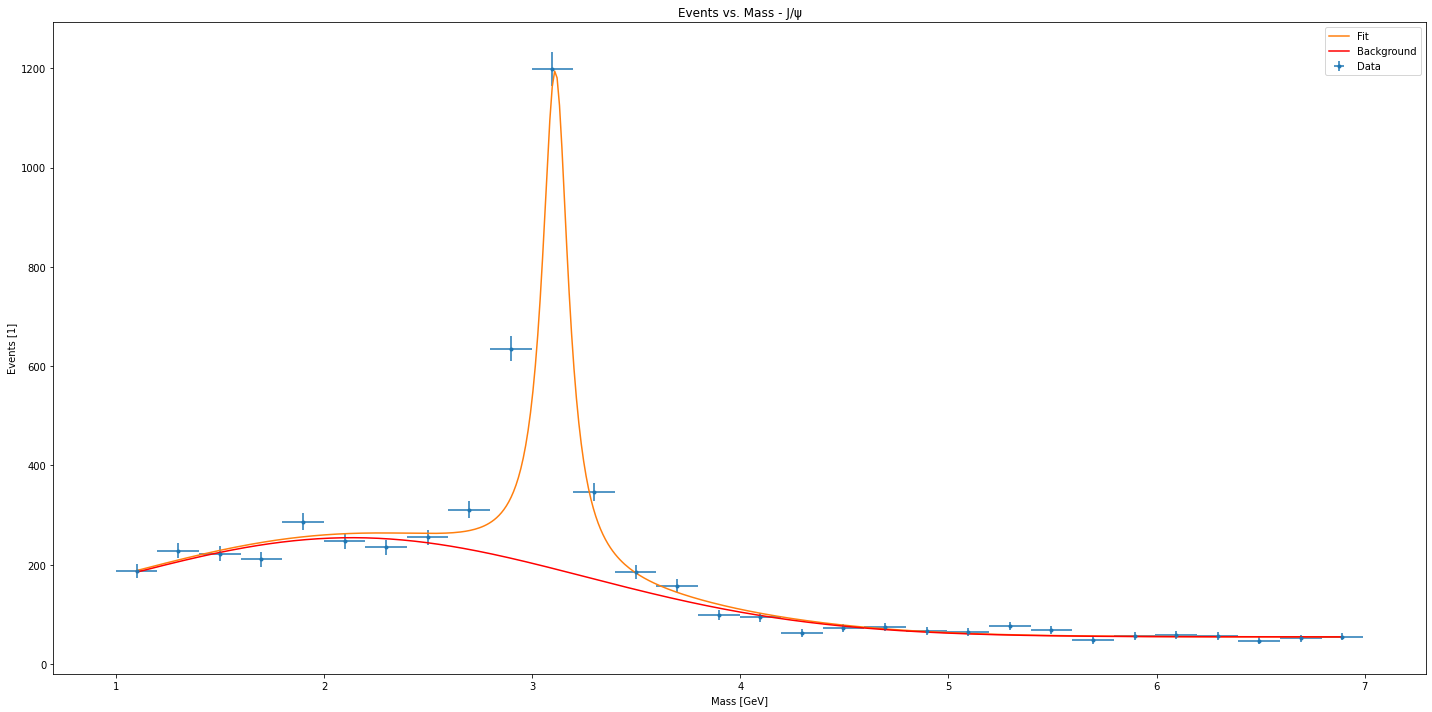

In [27]:
nrml = [199.777, 2.13501, 1.5841, 54.826]
bwjp = [227.371, 3.111, 0.153]
xJPsi = np.linspace(JPsi.index[0], JPsi.index[-1], num=500)
fitJPsi = [bwjp[0]/((x**2-bwjp[1]**2)**2+bwjp[1]**2 * bwjp[2]**2)+nrml[0]*np.exp(-((x - nrml[1]) / nrml[2])**2) + nrml[3] for x in xJPsi]
bkgJPsi = [nrml[0]*np.exp(-((x - nrml[1]) / nrml[2])**2) + nrml[3] for x in xJPsi]
plt.errorbar(JPsi.index,JPsi['events'],xerr=JPsi['ΔMass [Gev]'],yerr=JPsi['Δevents'],fmt='.', label = 'Data')
plt.plot(xJPsi, fitJPsi, label = 'Fit')
plt.plot(xJPsi, bkgJPsi, c='r', label = 'Background')
plt.xlabel('Mass [GeV]')
plt.ylabel('Events [1]')
plt.title('Events vs. Mass - J/ψ')
plt.legend()
plt.tight_layout()
plt.savefig(os.path.join(path, "Fit/Third Part/SR_JPsi/fit_bkg_JPsi.png"))
plt.show()

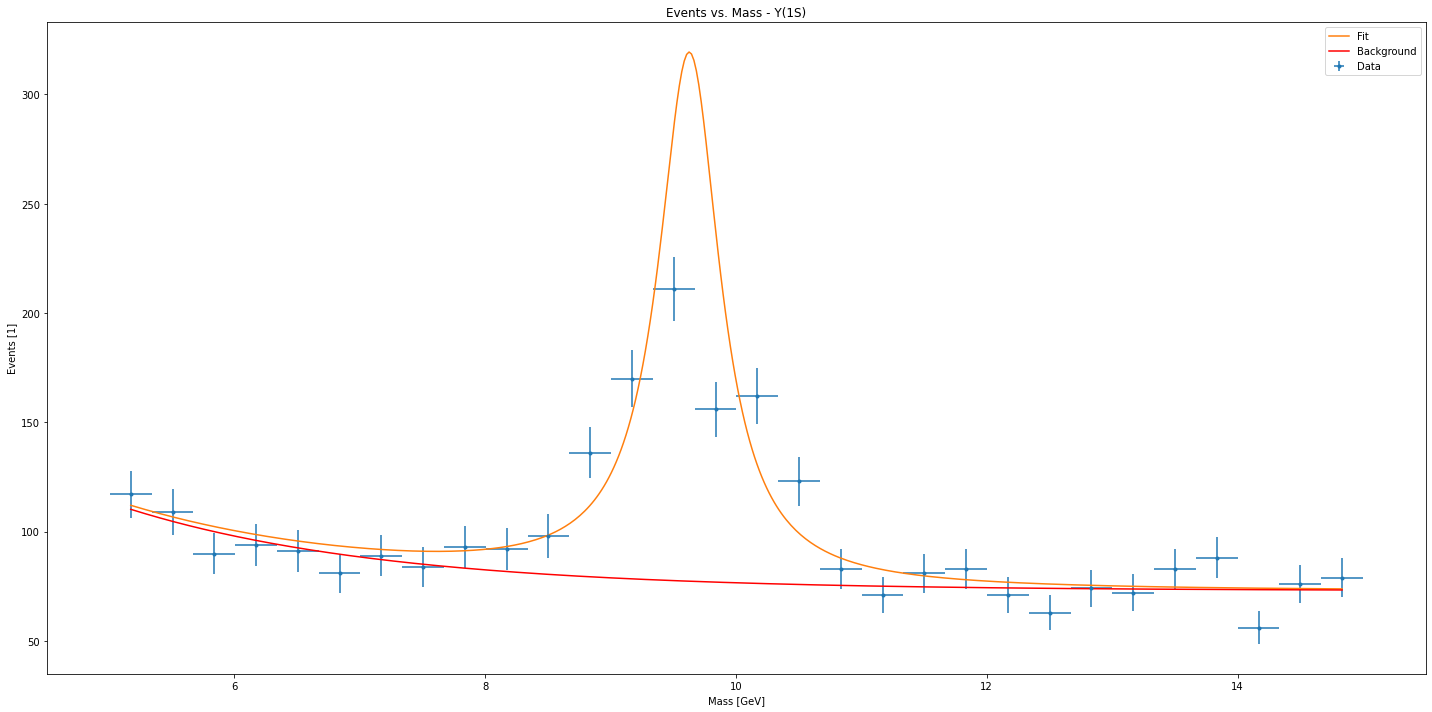

In [28]:
expo = [450.4, -0.4816, 72.966]
bwups = [8052.398, 9.628, 0.599]
xUps = np.linspace(UPS.index[0], UPS.index[-1], num=500)
fitUps = [bwups[0]/((x**2-bwups[1]**2)**2+bwups[1]**2 * bwups[2]**2)+expo[0]* np.exp(expo[1] * x) + expo[2] for x in xUps]
bkgUps = [expo[0]* np.exp(expo[1] * x) + expo[2] for x in xUps]
plt.errorbar(UPS.index,UPS['events'],xerr=UPS['ΔMass [Gev]'],yerr=UPS['Δevents'],fmt='.', label = 'Data')
plt.plot(xUps, fitUps, label = 'Fit')
plt.plot(xUps, bkgUps, c='r', label = 'Background')
plt.xlabel('Mass [GeV]')
plt.ylabel('Events [1]')
plt.title('Events vs. Mass - Y(1S)')
plt.legend()
plt.tight_layout()
plt.savefig(os.path.join(path, "Fit/Third Part/SR_UPS/fit_bkg_UPS.png"))
plt.show()